In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    return 100.0*(x[1] - x[0]**2)**2 + (1-x[0])**2

In [3]:
def derivative(x):
    df1 = (-400.0*x[0]*(x[1]-x[0]**2)) - 2.0*(1-x[0])
    df2 = 200.0*(x[1]- (x[0]**2))
    return np.array([df1, df2])

In [4]:
def hess(x):
    a = x[0]
    b= x[1]
    dxx = ((-400.0*b)+(1200.0*(a**2)) + 2.0).item()
    dxy = (-400.0*a).item()
    dyx = (-400.0*a).item()
    dyy = 200.0
    #print(dxx)
    hessian = np.array([[dxx,dxy],[dyx,dyy]])
    hessian = hessian.reshape(2,2)
    return hessian

# armijo

In [49]:
def armijo(point, direction, n):
    #beta = random.random()
    #sigma = random.uniform(0, .5)
    beta = 0.25
    sigma = 0.25
    (i, iter_conv) = (1, 0)
    conval = 0
    while i <= n:
        leftf = func(point+np.power(beta, i)*direction)
        
        rightf = func(point) + sigma*np.power(beta, i)*np.dot(derivative(point).T,direction)
        
        if leftf-rightf <= 0:
            iter_conv = i
            conval =np.power(beta, iter_conv)
            break
        i += 1
       
    return conval



# newton

In [50]:
def newton(x, maximum_iterations):
    i = 1
    vals = []
    objectfs = []
    # you can customize your own condition of convergence, here we limit the number of iterations
    while i <= maximum_iterations:
        vals.append(x)
        #objectfs.append(func(x))
        gradient = derivative(x)
        gradient= gradient.reshape(len(gradient),1)
        Hessian_matrix = hess(x)
        invhess =  np.linalg.inv(Hessian_matrix)
        direction = -np.dot(invhess, gradient)
        max_iter = 50
        step= armijo(starting_point, direction, max_iter)
        temp = x-step*(np.dot(invhess, gradient))
        
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        #print(x, func(x), miter)
        i += 1
    return vals, objectfs, i,x

In [51]:
starting_point = [-3.0, 8.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
starting_point.shape


maximum_iterations = 70
vals, objectfs, iterations,final = newton(starting_point, maximum_iterations)
print(final,iterations)


(array([[ 0.82264926],
       [ 0.67250178]]), 65)


Text(0,0.5,'x2')

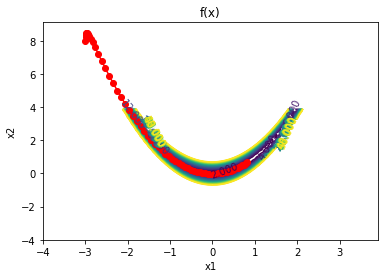

In [52]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = 100.0*(x2_mesh - x1_mesh**2)**2 + (1-x1_mesh)**2
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')
plt.title('f(x)')
plt.xlabel('x1')
plt.ylabel('x2')

# Conjugate

In [53]:
def conjugate_grad(point, n):
    i = 0
    grad = np.array([0, 0])
    old_grad = np.array([0, 0])
    beta = 0.25
    sigma = 0.25
    vals = []
    while i <= n:
        grad = derivative(point)
        #print(grad.shape)
        vals.append(point)
        if i == 0:
            d = -grad
            #print(d.shape)
        else: 
            beta = np.dot(grad.T, grad)/np.dot(old_grad.T, old_grad)
            d = -grad + beta*old_grad
            #print(d.shape)
        direction = d
        iterations = 20
        #print(point.shape)
        step = armijo(point, direction, iterations)
        
        point = point + step*d
        old_grad = grad
        old_d = d
        i = i+1
    return vals, point, i

In [54]:
starting_point = [-3.0, 2.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
maximum_iterations = 10000

vals, final, iterations= conjugate_grad(starting_point, maximum_iterations,  )
final

array([[-1.20049475],
       [ 1.41068041]])

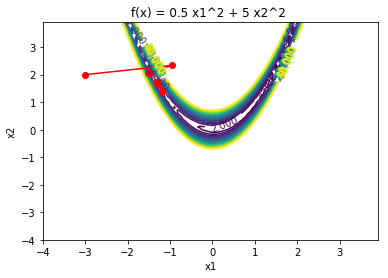

In [55]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = 100.0*(x2_mesh - x1_mesh**2)**2 + (1-x1_mesh)**2
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('f(x) = 0.5 x1^2 + 5 x2^2 ')
plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')

# Steepest

In [56]:
def steepest(point, max_iteration):
    val = []
    for i in range(max_iteration):
        grad = derivative(point)
        val.append(point)
        direction = -grad
        iterations = 100
        step = armijo(point, direction, iterations)
        point = point - (step*grad)
    return val, point, i

In [57]:
max_iterations = 500
starting_point = [-3.0, 2.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
vals, final, iterations = steepest(starting_point, max_iterations)
final

array([[ 0.69592849],
       [ 0.48468316]])

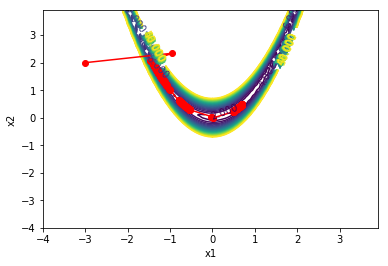

In [58]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = 100.0*(x2_mesh - x1_mesh**2)**2 + (1-x1_mesh)**2
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')

# Quasi Newton  BFGS

In [59]:
def qNewton1(pt, n):
    intial_hesse = [[1.0, 0.0],[0.0, 1.0]]
    old_pt = pt
    vals = []
    for i in range(n):
        old_grad = derivative(old_pt)
        vals.append(old_pt)
        inverse = np.linalg.inv(intial_hesse)
        direction = np.dot(-inverse.T, old_grad)
        iterations = 40
        step = armijo(old_pt,direction, iterations)
        delta_x = -np.dot(step,np.linalg.solve(intial_hesse,old_grad))
        #print(delta_x.shape)
        new_pt = old_pt + delta_x
        new_grad = derivative(new_pt)
        y = new_grad - old_grad
        if np.dot(y.T,delta_x)>0:
            A = np.dot(y,y.T)
            B = np.dot(y.T,delta_x).item()
            #print(part2)
            AB = A/B
            #print(part3.shape)
            C = np.dot(intial_hesse, delta_x)
            D = np.dot(C,C.T)
            E = np.dot(np.dot(delta_x.T,intial_hesse),delta_x)
            #print(part6.shape)
            DE = D/E
            intial_hesse = intial_hesse + AB - DE
            old_pt = new_pt
        else: 
            break
    return vals, old_pt, i

In [60]:
max_iterations = 100
starting_point = [-2.0, 3.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
vals, final,iterations = qNewton1(starting_point, max_iterations)
final

array([[ 0.99999782],
       [ 0.99999557]])

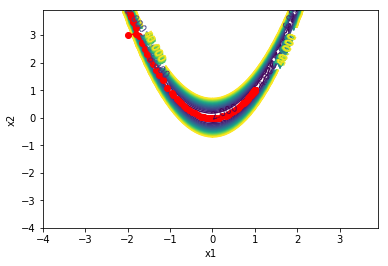

In [61]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = 100.0*(x2_mesh - x1_mesh**2)**2 + (1-x1_mesh)**2
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')

# Quasi newton- SR1

In [62]:
def qNewton2(pt, n):
    intial_hesse = [[1.0, 0.0],[0.0, 1.0]]
    old_pt = pt
    vals = []
    i = 0
    while i < n:
        old_grad = derivative(old_pt)
        vals.append(old_pt)
        inverse = np.linalg.inv(intial_hesse)
        direction = np.dot(-inverse.T, old_grad)
        iterations = 400
        step = armijo(old_pt,direction, iterations)
        delta_x = -np.dot(step,np.linalg.solve(intial_hesse,old_grad))
        #print(delta_x.shape)
        new_pt = old_pt + delta_x
        new_grad = derivative(new_pt)
        y = new_grad - old_grad
        if np.dot((y -np.dot(intial_hesse,delta_x)).T,delta_x)>0:
            A = np.dot(y -np.dot(intial_hesse,delta_x) ,(y -np.dot(intial_hesse,delta_x)).T)
            #B = np.dot(y -np.dot(intial_hesse,delta_x).T,delta_x)
            B1 = y -np.dot(intial_hesse,delta_x)
            B = np.dot(B1.T,delta_x).item()
            
            #print(part2)
            AB = A/B
            intial_hesse = intial_hesse + AB
            old_pt = new_pt
            i = i + 1
        else: 
            break
    return vals, old_pt, i

In [63]:
max_iterations = 20
starting_point = [-3.0, 2.0]
starting_point = np.array(starting_point)
starting_point = starting_point.reshape(2,1)
vals, final, iterations = qNewton2(starting_point, max_iterations)
final
iterations

3

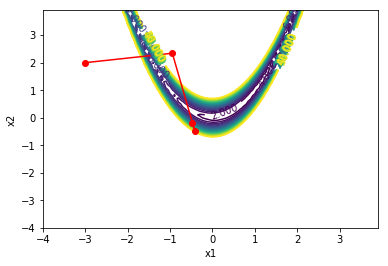

In [64]:
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
f_mesh = 100.0*(x2_mesh - x1_mesh**2)**2 + (1-x1_mesh)**2
plt.figure()
lines = range(2,52,2)
CS = plt.contour(x1_mesh, x2_mesh, f_mesh,lines)
plt.clabel(CS, inline=1, fontsize=10)

plt.xlabel('x1')
plt.ylabel('x2')
vals = np.array(vals)
plt.plot(vals[:,0],vals[:,1],'r-o')